In [312]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#importing matrix for regression model
from sklearn.metrics import accuracy_score,confusion_matrix


In [313]:
# importing dataset using pandas function
df = pd.read_csv('bank.csv',sep = ';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2283,45,entrepreneur,married,tertiary,no,0,yes,no,cellular,29,jul,100,3,-1,0,unknown,no
3713,32,blue-collar,married,secondary,no,119,no,no,cellular,4,may,20,5,-1,0,unknown,no
516,34,technician,married,tertiary,no,691,yes,yes,unknown,2,jun,70,1,-1,0,unknown,no
3844,39,admin.,married,secondary,no,607,yes,no,cellular,12,may,454,2,364,3,failure,yes
2026,25,admin.,married,secondary,no,894,yes,no,unknown,28,may,328,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
423,37,management,single,tertiary,no,876,yes,no,cellular,15,apr,140,4,327,2,failure,no
2976,28,blue-collar,single,secondary,no,56,yes,no,unknown,23,may,66,1,-1,0,unknown,no
123,36,blue-collar,married,secondary,no,-231,no,yes,cellular,15,jul,779,2,-1,0,unknown,no


In [314]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [315]:
#evaluate descriptive stats : EDA
#step 1 : Segregate Categorical columns nad numerical columns
categorical_col = df.select_dtypes(include='object')
numerical_col = df.select_dtypes(exclude='object')

In [316]:
'''
step 1 : making blank list
step 2 : by using OrederedDict we make dictionary
step 3 : append the column into it '''

from collections import OrderedDict

stats=[]
for col in numerical_col.columns:
  numerical_stats = OrderedDict({
      'feature':col,
      'mean':df[col].mean(),
      'median':df[col].quantile(0.50),
      'mode':df[col].mode()[0],
      'min':df[col].min(),
      'max':df[col].max(),
      'std':df[col].std(),
      'var':df[col].var(),
      'skew':df[col].skew(),
      'kurt':df[col].kurtosis(),
      'iqr':df[col].quantile(0.75)-df[col].quantile(0.25),
      'q1': df[col].quantile(0.25),
      'q3': df[col].quantile(0.75),
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,feature,mean,median,mode,min,max,std,var,skew,kurt,iqr,q1,q3
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,16.0,33.0,49.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,1411.0,69.0,1480.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,12.0,9.0,21.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,225.0,104.0,329.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,2.0,1.0,3.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,0.0,-1.0,-1.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


In [317]:
'''when your evaluating descriptive statistics make sure that IQR of any column cannot be 0 such column cannot contribute in machine learning model  '''

'when your evaluating descriptive statistics make sure that IQR of any column cannot be 0 such column cannot contribute in machine learning model  '

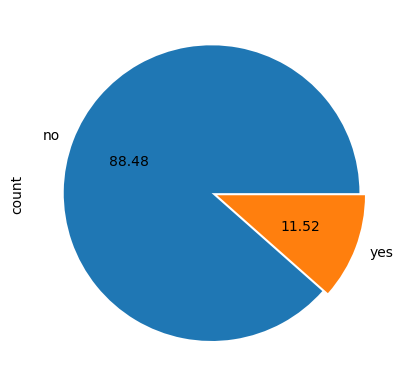

In [318]:
# Problem Definition:
'''
The Dataset Consist  of 4521 row and 17 columns . This dataset belong to
portugal b ank where our aim is to classify whether the customer will subscribe
the bank term deposite or not :

Type of machine learning model: Binary Classification

Above Dataset is a type of Multivariate Analysis

X: Independent column
y: Target Column / Dpendent column

Here, y acts as Target Column / Dependent Column.
'''

#Checking the DIstrubution of pepole  who subscribe the term deposite
''' Based on distrubution of Target column we found that the data is imbalance.'''
df['y'].value_counts().plot(kind='pie', autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [319]:
# Data Insight
'''
1. 88.48% pepole are not subscribe bank term deposite.
2. The Average Call Durarion Recorded is 264 seconds . This can be one of the cause
   for the pepole who have not subscribe the bank term deposite.
3. if call duration is more than 300 seconds the chances are there that
   person will subscribe the bank term deposite.
4. Target Audiance is Divoresed pepole.
5. Pepole who have taken loan are esxcluded from bank term deposite


'''
df['duration'].mean()

263.96129174961294

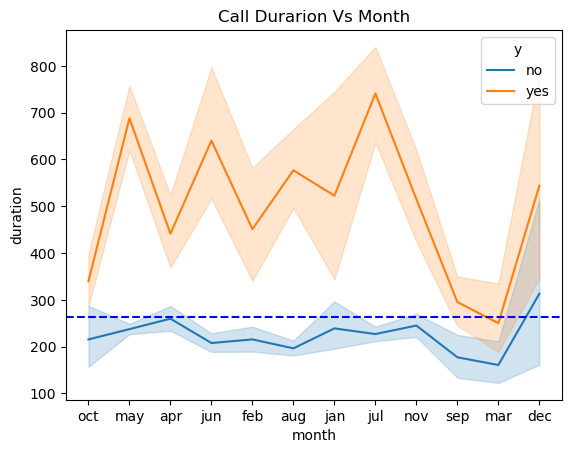

In [320]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

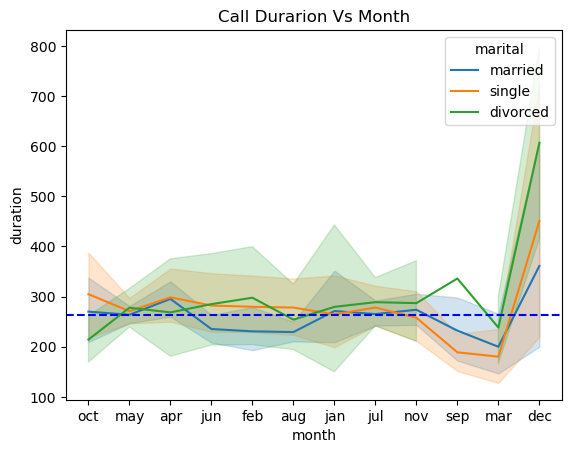

In [321]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['marital'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

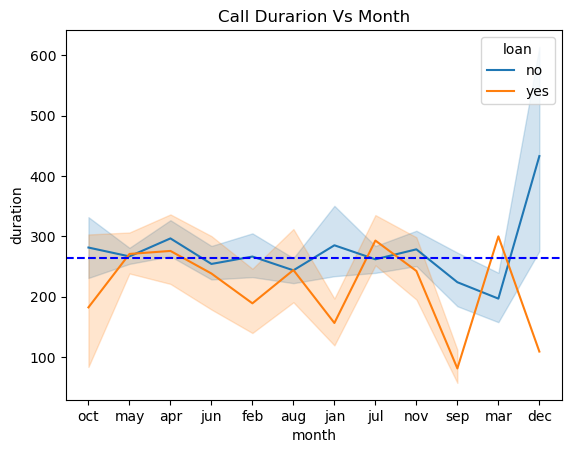

In [322]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['loan'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

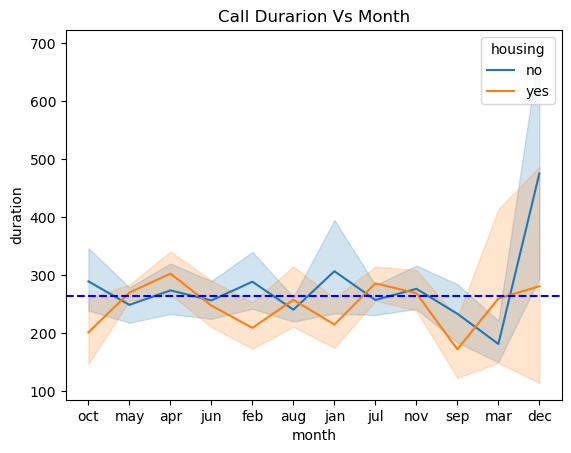

In [323]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['housing'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

<Axes: ylabel='count'>

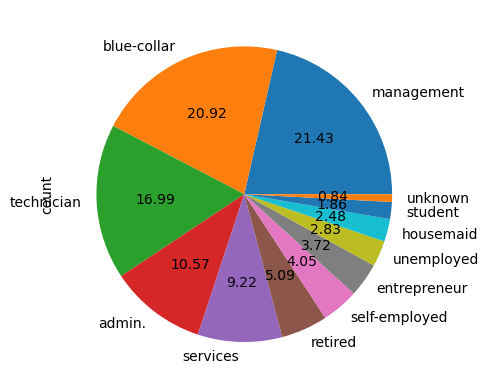

In [324]:
df['job'].value_counts().plot(kind='pie', autopct = '%1.2f')

In [325]:
management = df[df['job']=='management']
bluecollar = df[df['job']=='blue-collar']
technician = df[df['job']=='technician']
admin = df[df['job']=='admin.']

<Axes: ylabel='count'>

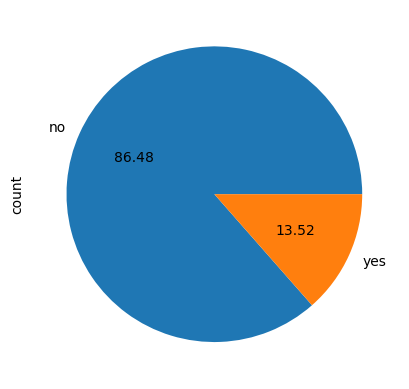

In [326]:
management['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

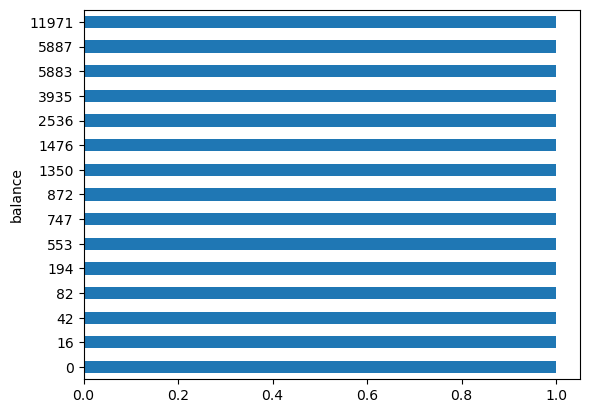

In [327]:
management['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')


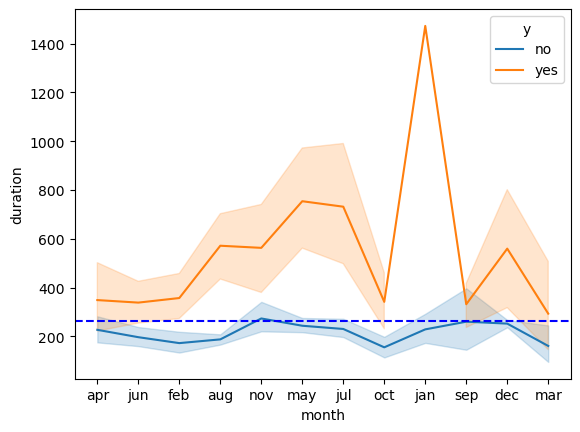

In [328]:
sns.lineplot(x =management['month'] , y = management['duration'],hue  = management['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

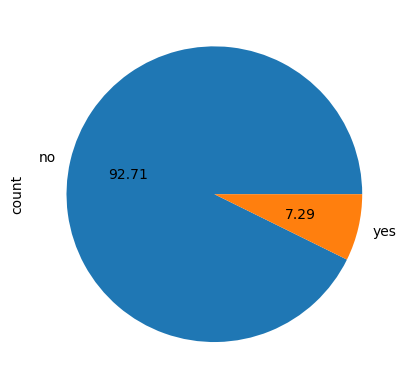

In [329]:
bluecollar['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

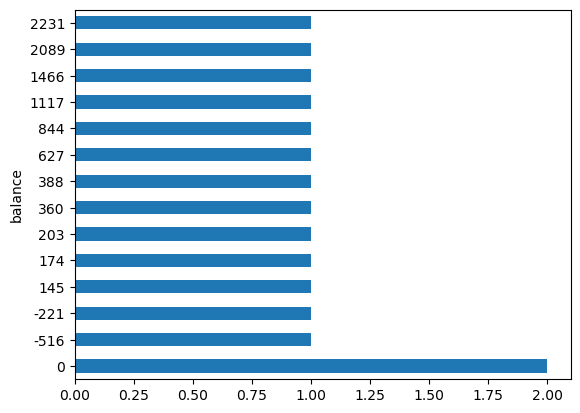

In [330]:
bluecollar['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

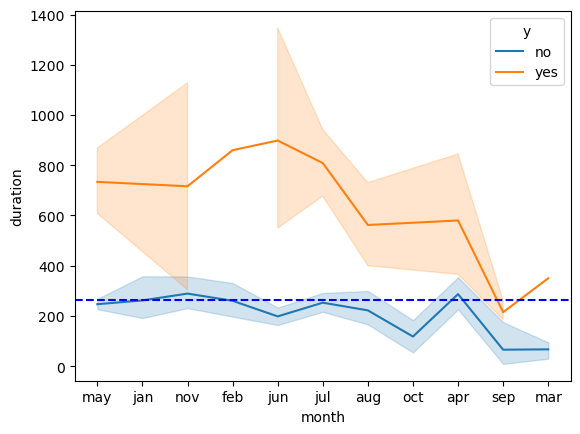

In [331]:
sns.lineplot(x =bluecollar['month'] , y = bluecollar['duration'],hue  = bluecollar['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

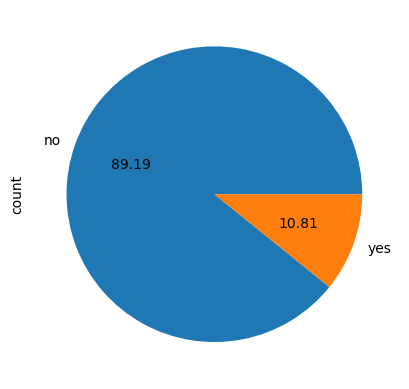

In [332]:
technician['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

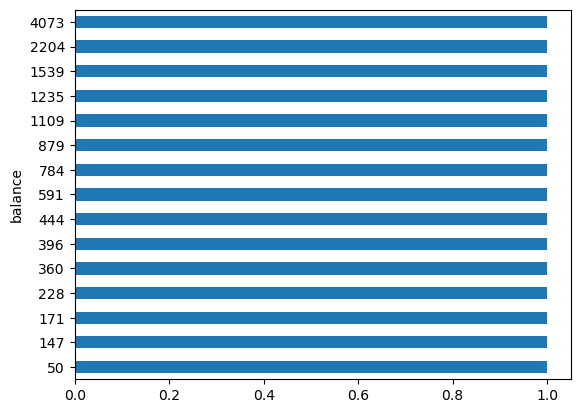

In [333]:
technician['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

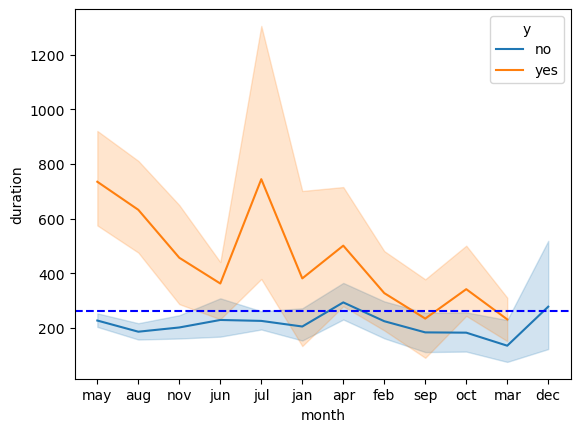

In [334]:
sns.lineplot(x =technician['month'] , y = technician['duration'],hue  = technician['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

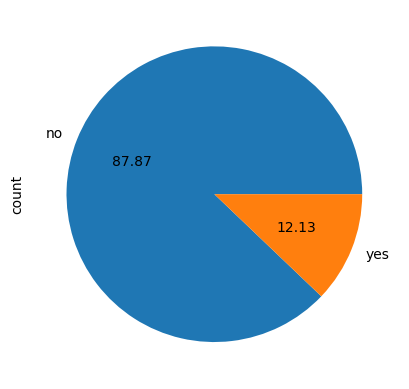

In [335]:
admin['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

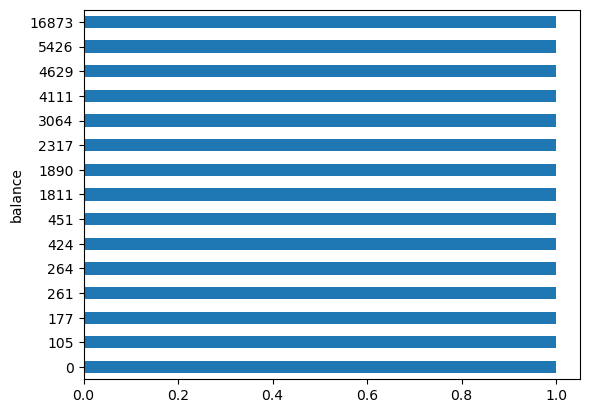

In [336]:
admin['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

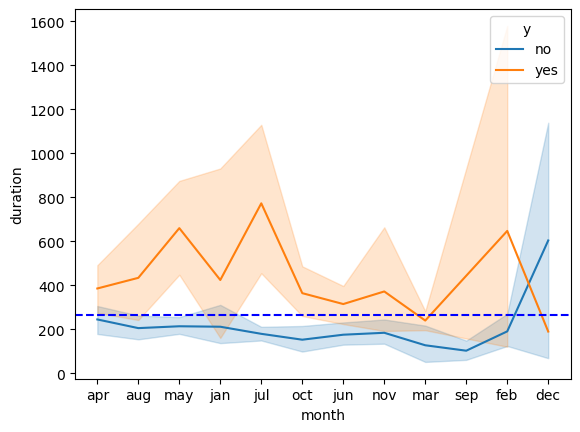

In [337]:
sns.lineplot(x =admin['month'] , y = admin['duration'],hue  = admin['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

In [338]:
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [339]:
'''
1. pdays and previous have 0 IQR ,Hence we need to drop these tw2o columns from the dataset
'''
#Create a copy of df
data =  df.copy()
data.sample(frac=1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
732,50,management,married,tertiary,no,3463,no,yes,cellular,28,oct,96,1,-1,0,unknown,yes
1280,30,technician,single,tertiary,no,236,yes,no,unknown,16,may,197,1,-1,0,unknown,no
402,27,blue-collar,single,secondary,no,148,no,no,cellular,22,jul,203,1,-1,0,unknown,no
2071,37,services,married,secondary,no,4760,yes,no,cellular,20,nov,187,2,-1,0,unknown,no
3978,66,retired,married,tertiary,no,1948,no,no,cellular,28,jan,216,1,91,4,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,28,technician,single,tertiary,no,172,yes,yes,cellular,2,feb,194,2,-1,0,unknown,no
2865,51,housemaid,divorced,secondary,no,9228,no,no,cellular,18,jul,655,4,-1,0,unknown,yes
1225,51,blue-collar,married,secondary,no,160,yes,no,cellular,7,may,136,1,359,1,failure,no
1755,38,technician,married,secondary,no,226,yes,no,unknown,30,may,762,3,-1,0,unknown,yes


In [340]:
#Encoding using get_dummies method
'''
Observation :
1. The Number of columns are increased, which impact badly w.r.t. Model Building
'''
data = pd.get_dummies(data,drop_first=True,dtype = 'int')

In [341]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [342]:
#Encoding Technique : Label Encoder
'''
independent column can be encoded directly using LabelEncoder
2. Target column must be Decoded seprately either by using replace function or 
map function'''
preprocess_data = df.copy() 
preprocess_data

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])

#Transforming Target column to numerical

df['y'] = df['y'].replace({'yes':1,'no':0})

In [343]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [344]:
'''
step 1: split the data into X and y

step 2: split the data into 
        train data:seen data
        test data : unseen data

step 3: Try balance the target column in case of classification problem
        Imbalance technique : 1. Oversampeling 2. Undersampling

step 4: use Scaling technique
        1. MinMaxScaler
        2.RobustScaler
        3.StandardScaler

Step 5: Model Building        
'''

'\nstep 1: split the data into X and y\n\nstep 2: split the data into \n        train data:seen data\n        test data : unseen data\n\nstep 3: Try balance the target column in case of classification problem\n        Imbalance technique : 1. Oversampeling 2. Undersampling\n\nstep 4: use Scaling technique\n        1. MinMaxScaler\n        2.RobustScaler\n        3.StandardScaler\n\nStep 5: Model Building        \n'

In [345]:
#Step 1 : Split the dataset 
X = df.drop(columns = ['pdays','previous','y'],axis= 1)
y = df['y']

In [346]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [347]:
# Step 2:  split data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42)

In [348]:
#Step 3: Balancing the target column 
#

In [349]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

y
0    2795
1    2795
Name: count, dtype: int64

In [350]:
''''from imblearn.under_sampling import ClusterCentroids
sm =ClusterCentroids(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()'''

"'from imblearn.under_sampling import ClusterCentroids\nsm =ClusterCentroids(random_state=42)\nX_train,y_train = sm.fit_resample(X_train,y_train)\ny_train.value_counts()"

In [351]:
#STEP 4 : SCALING techniques
sc = MinMaxScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#when data is balancinng then also use standard scaling

In [352]:
#step 5 model building
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print("The model accuracy for the random forest regressor",accuracy_score(y_pred_RF,y_test)*100)

The model accuracy for the random forest regressor 87.17759764185703


In [353]:
'''
when model is over fit then use 
1 : robust technique
2 : check the outlier
3 : check variance 
4 : data leakage
'''

'\nwhen model is over fit then use \n1 : robust technique\n2 : check the outlier\n3 : check variance \n4 : data leakage\n'

In [354]:
#Logistic Regression Model
'''
Classification problem : 1.Binary classification : Signmoid function
                         2.Multiclass classification : Softmax Classification
 '''
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print("The accuracy for the logistic regression model",accuracy_score(y_pred_LR,y_test)*100)

The accuracy for the logistic regression model 81.50331613854091


<Axes: xlabel='y', ylabel='Density'>

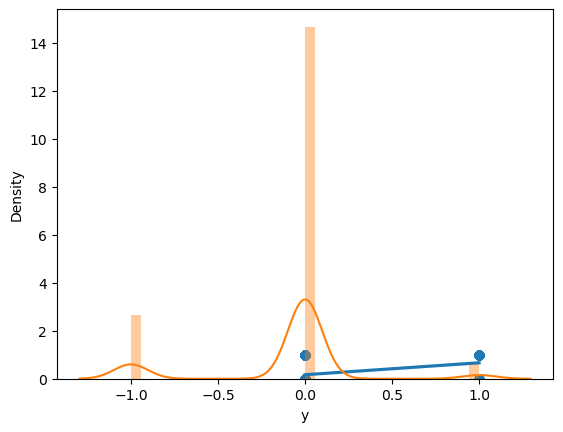

In [355]:
#model performance
sns.regplot(x = y_test , y = y_pred_LR)
sns.distplot(y_test-y_pred_LR)

In [356]:
from sklearn.linear_model import SGDClassifier
SG = SGDClassifier(random_state=42).fit(X_train,y_train)
y_pred_SG = SG.predict(X_test)
print("the accuracy score for sgdclassifier",accuracy_score(y_pred_SG,y_test)*100)

the accuracy score for sgdclassifier 79.80840088430361


In [ ]:
from sklearn import svm 
SV = svm.SVC().fit(X_train,y_train)
y_pred_SV = SV.predict(X_test)
print("the accuracy score for svm",accuracy_score(y_test,y_pred_SV))
#it require more data for accuracy

the accuracy score for svm 0.8489314664701547


In [358]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier().fit(X_train,y_train)
y_pred_KN = KN.predict(X_test)
print("The accuracy for the knn",accuracy_score(y_pred_KN,y_test)*100)

The accuracy for the knn 81.57700810611644


In [359]:
from sklearn.cluster import KMeans
KM = KMeans().fit(X_test,y_test)
y_pred_KM = KM.predict(X_test)
print("the accuracy for kmeans",accuracy_score(y_pred_KM,y_test)*100)

the accuracy for kmeans 18.717759764185704
